In [1]:
import numpy as np
import pandas as pd
import twp
import yfinance as yf

from twp.functions import logReturns, sharpe, drawdown

import pandas_bokeh
pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')

Loading BokehJS ...

In [3]:
# index
start='2015-01-01' 
end='2022-01-01'

inx = yf.download("^GSPC",start=start,end=end)["Close"]
inx.plot()

drawdown(logReturns(inx)).plot()

[*********************100%***********************]  1 of 1 completed


Figure(id='1415', ...)

In [4]:
# get S&P 500 components
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

symbols = [s.replace(".","-") for s in first_table['Symbol'].values.tolist()]
symbols[:10]

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP']

In [5]:
twp.functions.logReturns(inx).cumsum().plot()

Figure(id='1654', ...)

In [6]:
# get some Yahoo finance data
symbols = ['AAPL',"GOOG","FB","MSFT", "BRK-B","XOM","CVX"]

import os
data_file = "data/sp500.csv"
if not os.path.exists("data"):
    os.mkdir("data")

if os.path.exists(data_file): # load from file
    close = pd.read_csv(data_file, parse_dates=True, index_col=0)
else:
    df = yf.download(symbols, 
                          start=start, 
                          end=end, 
                          progress=True,
    )


    close = df["Adj Close"]
    close.to_csv("data/sp500.csv", float_format = "%.4f")

    
    
close[symbols].plot()

Figure(id='1914', ...)

In [8]:
ret = logReturns(close)
ret[symbols].cumsum().plot()

drawdown(ret[symbols]).plot()

Figure(id='3771', ...)

In [9]:
sh = sharpe(ret)
sh.sort_values()

VTRS   -0.498644
OGN    -0.334411
SLB    -0.294515
DISH   -0.293825
AAL    -0.286711
          ...   
WST     1.219468
MSCI    1.274638
NVDA    1.293741
CARR    1.836602
CEG          NaN
Length: 504, dtype: float64

In [10]:
# check sharpes before and after
split = int(len(close)/2)

ret1 =  ret.iloc[:split,:]
ret2 = ret.iloc[split:,:]

sh1 = sharpe(ret1)
sh2 = sharpe(ret2)


sh1.corr(sh2)


0.30561084777193337

In [21]:
#drawdowns

dd1 = drawdown(ret1).min()
dd2 = drawdown(ret2).min()

dd1.corr(dd2)


0.3456067001911169

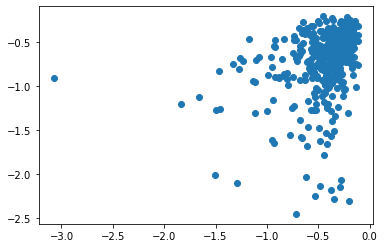

In [22]:
import matplotlib.pyplot as plt

plt.plot(dd1,dd2, 'o')

In [25]:
# create test portfolio
chosen = dd1.dropna().sort_values().index[-10:]
dd1[chosen]

MMC    -0.143908
NEE    -0.142967
PGR    -0.142427
FISV   -0.136679
FTV    -0.132482
SYY    -0.129163
LW     -0.116530
NDAQ   -0.116074
JKHY   -0.115567
RSG    -0.111957
dtype: float64

In [33]:
# portfolios

port = pd.DataFrame({"min_dd": ret[chosen].mean(1), 
                     "hand": ret[['AAPL',"GOOG","FB","MSFT", "BRK-B","XOM","CVX"]].mean(1),
                     "SPY":logReturns(inx)})
port.cumsum().plot()

Figure(id='7418', ...)

In [34]:
drawdown(port).plot()

Figure(id='8037', ...)

In [35]:
sharpe(port)

min_dd    0.993694
hand      0.788433
SPY       0.662466
dtype: float64

In [113]:
ret_inx = logReturns(inx)
sharpe(ret_inx)

0.6624662742269574

# Drawdown example calculation

In [127]:
s = ret["AAPL"].cumsum()
dd = s-s.cummax() 
dd.plot()
close["AAPL"].plot()

Figure(id='35021', ...)

In [126]:
1-np.exp(-0.377)

0.31408392610397984

In [125]:
(80.691-55.33)/80.69

0.3143016482835544